In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
# Set up the training, validation, and testing data directories
train_dir = r"C:\Users\hp\Desktop\ResNet 101\train"
val_dir = r"C:\Users\hp\Desktop\ResNet 101\val"
test_dir = r"C:\Users\hp\Desktop\ResNet 101\test"

In [3]:
# Define the input image size
img_size = 224

# Define the number of classes
num_classes = 14

In [4]:
# Set up data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

In [5]:
# Set up the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 698 images belonging to 14 classes.
Found 140 images belonging to 14 classes.


In [6]:
# Load the ResNet101 model and remove the top layers
base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

In [7]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [8]:
# Add new layers for classification
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dense(524, activation='relu')(x)
x = Dense(num_classes, activation='softmax')(x)

In [9]:
# Create the model
model = Model(inputs=base_model.input, outputs=x)

In [10]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size)

Epoch 1/10
21/21 [==============================] - 89s 4s/step - loss: 0.5456 - accuracy: 0.8709 - val_loss: 0.2344 - val_accuracy: 0.9219
Epoch 2/10
21/21 [==============================] - 84s 4s/step - loss: 0.3933 - accuracy: 0.9144 - val_loss: 0.2033 - val_accuracy: 0.9531
Epoch 3/10
21/21 [==============================] - 80s 4s/step - loss: 0.2015 - accuracy: 0.9399 - val_loss: 0.2210 - val_accuracy: 0.9609
Epoch 4/10
21/21 [==============================] - 80s 4s/step - loss: 0.2187 - accuracy: 0.9535 - val_loss: 0.1541 - val_accuracy: 0.9609
Epoch 5/10
21/21 [==============================] - 79s 4s/step - loss: 0.1697 - accuracy: 0.9598 - val_loss: 0.1785 - val_accuracy: 0.9609
Epoch 6/10
21/21 [==============================] - 78s 4s/step - loss: 0.1496 - accuracy: 0.9595 - val_loss: 0.3234 - val_accuracy: 0.9609
Epoch 7/10
21/21 [==============================] - 81s 4s/step - loss: 0.1350 - accuracy: 0.9655 - val_loss: 0.3928 - val_accuracy: 0.9609
Epoch 8/10
21/21 [==

In [13]:
# Evaluate the model on the testing set
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='categorical')

Found 147 images belonging to 14 classes.


In [14]:
test_loss, test_acc = model.evaluate(test_generator)

5/5 [==============================] - 12s 2s/step - loss: 0.4249 - accuracy: 0.9184


In [15]:
print('Test accuracy:', test_acc)

Test accuracy: 0.918367326259613


In [16]:
# model.save(r"C:\Users\hp\Desktop\ResNet 101")

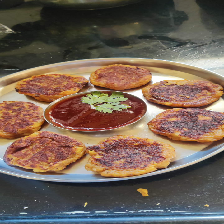

In [17]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\aloo_tikki 1.jpeg", target_size=(224, 224))
img

In [18]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [19]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 3s 3s/step


In [20]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: aloo_tikki


## Checking on baati

In [ ]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\baati 1.jpeg", target_size=(224, 224))
img

In [ ]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [ ]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

In [ ]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

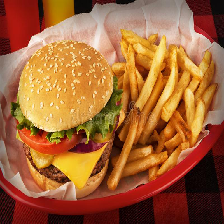

In [21]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\burger.jpeg", target_size=(224, 224))
img

In [22]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [23]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 189ms/step


In [24]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: burger


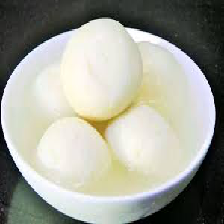

In [25]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\rg.jpeg", target_size=(224, 224))
img

In [26]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [27]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 154ms/step


In [28]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: rasgulla


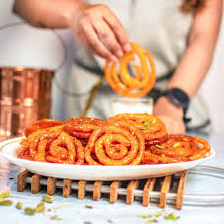

In [29]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\jalebi.jpeg", target_size=(224, 224))
img

In [30]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [31]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 154ms/step


In [32]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: jalebi


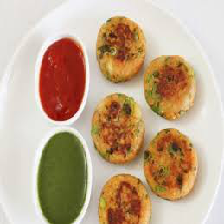

In [33]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\tikki.jpeg", target_size=(224, 224))
img

In [34]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [35]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 149ms/step


In [36]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: aloo_tikki


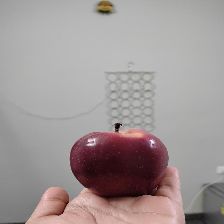

In [37]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\apple.jpeg", target_size=(224, 224))
img

In [38]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [39]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 151ms/step


In [40]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: apple


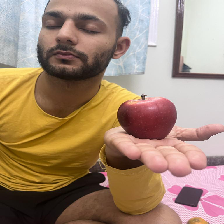

In [41]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\apple 1.jpeg", target_size=(224, 224))
img

In [42]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [43]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 155ms/step


In [44]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: burger


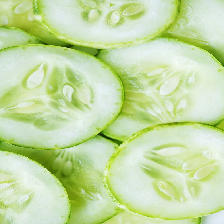

In [45]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\cucumber.jpg", target_size=(224, 224))
img

In [46]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [47]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 138ms/step


In [48]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: cucumber


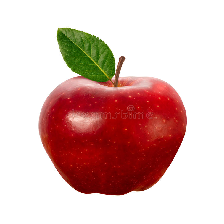

In [60]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\app.jpg", target_size=(224, 224))
img

In [61]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [62]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 293ms/step


In [63]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: apple


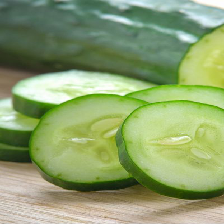

In [53]:
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\hp\Desktop\ResNet 101\new_images\c1.jpg", target_size=(224, 224))
img

In [54]:
import numpy as np

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [55]:
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

1/1 [==============================] - 0s 113ms/step


In [56]:
class_labels = train_generator.class_indices
for label, idx in class_labels.items():
    if idx == class_idx:
        print("Predicted class is:", label)

Predicted class is: cucumber


In [59]:
model.save(r"C:\Users\hp\Desktop\ResNet 101\model.h5")